**Problem Framing:**

Credit scores play a pivotal role in personal finance. Whether or not they perfectly capture one’s financial responsibility, they undeniably influence access to loans, credit cards, and other financial products. In fact, many Americans—particularly those with lower scores—report that their credit score has prevented them from securing a financial product in the past year.

Recent survey data indicate that paying off debt is the primary way people have improved their credit scores, while late payments remain the top reason for score declines. Overall, 42% of Americans have seen their scores rise in the last year, whereas 14% say their score has dropped.

Against this backdrop, our first analysis will investigate the impact of late payments on credit scores, as well as how related factors such as outstanding debt and user attributes (income, demographics, etc.) shape this effect.

We will also explore credit utilization—the ratio of used credit to available credit—since it is one of the more direct levers consumers can adjust in their financial habits.

Keeping utilization low (often below 30%) is cited as one of the simplest strategies for maintaining a stronger credit score. However, there is ongoing debate about the precise thresholds, how short-term vs. long-term usage might differently affect scores, and how other credit factors can moderate or even overshadow utilization’s role.

Resource: https://www.lendingtree.com/personal/credit-scores-financial-products-survey/


# Installing and adding Libraries

In [3]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [11]:
!pip install dowhy
!pip install causalml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.1 MB/s eta 0:00:00


In [10]:
from dowhy import CausalModel
from causalml.inference.meta import BaseXRegressor
from sklearn.ensemble import GradientBoostingRegressor

ModuleNotFoundError: No module named 'causalml'

In [5]:
## Add all the new libraries that you used here
!pip install causalml
!pip install dowhy
!pip install econml
!pip install duecredit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 k

In [6]:
import importlib
print(importlib.metadata.version('causalml') )

0.15.3


# Reading the data

In [44]:
# Load CSV files
#df = pd.read_csv('train_cleaned.csv')
df = pd.read_csv('feature_library.csv')
df.shape

(100000, 62)

In [41]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'income_zscore',
       'Monthly_Inhand_Salary_log', 'Delay_Zscore', 'Month_num', 'Month_sin',
       'Month_cos', 'Auto Loan', 'Credit-Builder Loan', 'Personal Loan',
       'Home Equity Loan', 'Not Specified', 'No Loan', 'Mortgage Loan',
       'Student Loan', 'Debt Consolidation Loan', 'Payday Loan',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
    

Causal inference relies on preserving the true distribution and relationships among treatment, outcome, and confounders. Creating synthetic data points can break these relationships and bias the effect estimates. We did not have any major imbalances as we saw before so there id no need for methods like SMOTE here.

**Input from Feauture Importance**

Selected Features:

['num__Outstanding_Debt', 'num__Credit_Utilization_Ratio']

Also, Random Forest feauture importance

num__Outstanding_Debt             0.107338
num__Interest_Rate                0.087533
num__Delay_from_due_date          0.050210

Feauture Importance from Lasso CV:

num__Num_of_Delayed_Payment       0.124748
num__Num_Bank_Accounts            0.039877
num__Monthly_Inhand_Salary_log    0.039418

# Causal Inference models

## **Causal Inference Model Description: Option1**

**Research Question**: How does having delayed payments affect an individual’s likelihood of having a good, standard, or poor credit score?

**Treatment Variable:** Delay_from_due_date, Num_of_Delayed_Payment, Delay_Zscore

**Outcome Variable:** Credit Score: categorized as “Good,” “Standard,” or “Poor.”

**Control Variables:**  Outstanding_Debt, Num_Bank_Accounts, Num_Credit_Card, Credit_Utilization_Ratio, Monthly_Balance, Credit_History_Age

Here the focus is to measure the causal impact of payment behavior on credit score, we focused on payment behaviour metrics rather than user level metrics.

Check the relationhsip between Outcome and tratment variables

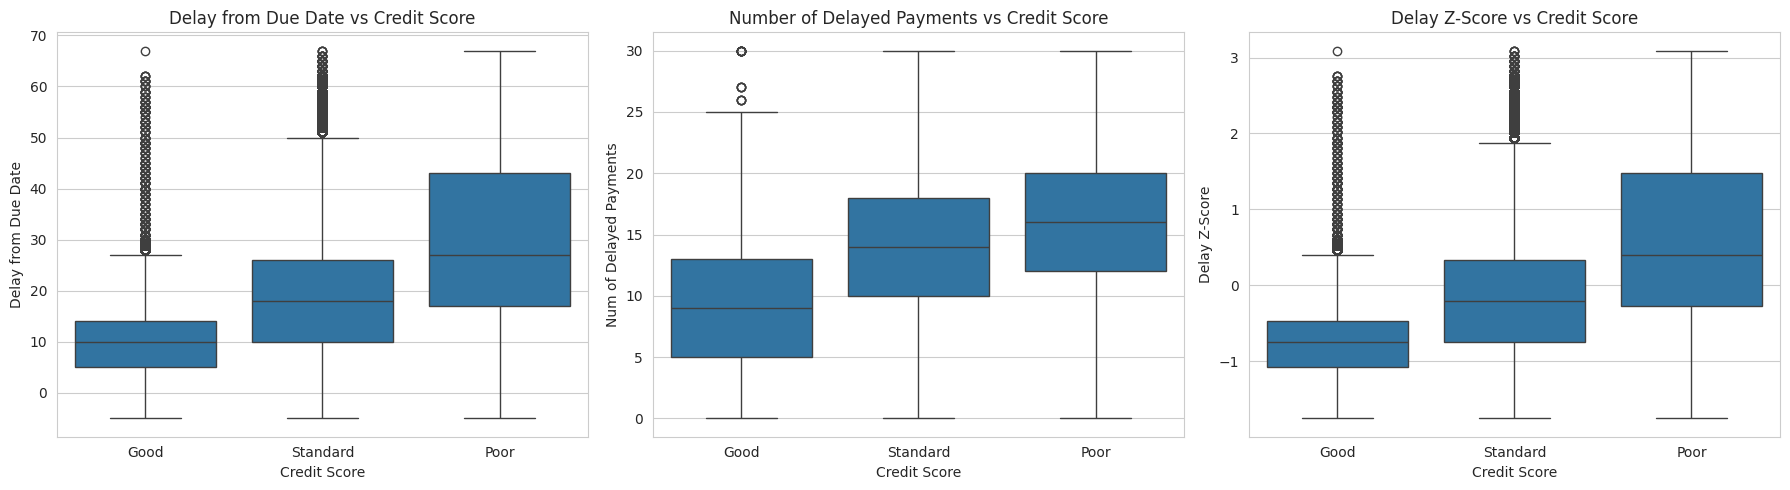

In [42]:
#First plot the relationship between credit score and the three treatments variables
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Define figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Delay_from_due_date vs Credit Score
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, ax=axes[0])
axes[0].set_title('Delay from Due Date vs Credit Score')
axes[0].set_xlabel('Credit Score')
axes[0].set_ylabel('Delay from Due Date')

# Plot 2: Num_of_Delayed_Payment vs Credit Score
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, ax=axes[1])
axes[1].set_title('Number of Delayed Payments vs Credit Score')
axes[1].set_xlabel('Credit Score')
axes[1].set_ylabel('Num of Delayed Payments')

# Plot 3: Delay_Zscore vs Credit Score
sns.boxplot(x='Credit_Score', y='Delay_Zscore', data=df, ax=axes[2])
axes[2].set_title('Delay Z-Score vs Credit Score')
axes[2].set_xlabel('Credit Score')
axes[2].set_ylabel('Delay Z-Score')

# Show plots
plt.tight_layout()
plt.show()

We see a clear distinction and pattern between different credit scores in terms of the three treatment variables.so we will continue with causal models.

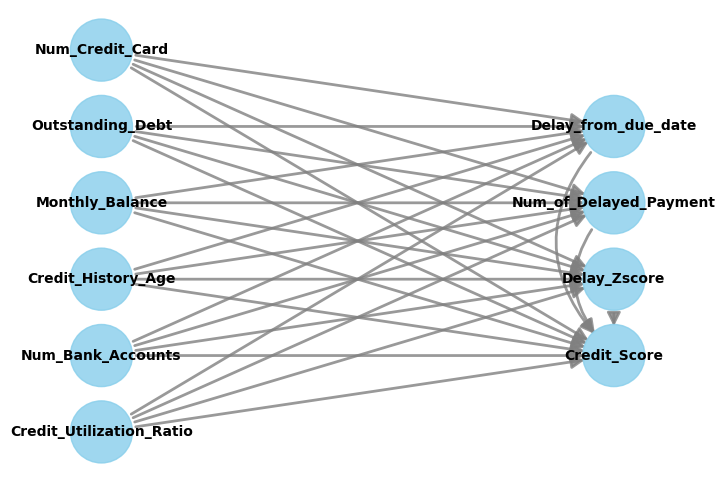

In [46]:
#Build and show the causal model

# Define the Causal Model
model = CausalModel(
    data=df,
    treatment=["Delay_from_due_date", "Num_of_Delayed_Payment", "Delay_Zscore"],
    outcome="Credit_Score",
    common_causes=["Outstanding_Debt", "Num_Bank_Accounts", "Num_Credit_Card",
                   "Credit_Utilization_Ratio", "Monthly_Balance", "Credit_History_Age"]
)

# Show the model's causal graph
model.view_model()

# Display the causal graph
plt.show()


In [47]:
#Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                             d                                                                     ↪
────────────────────────────────────────────────────────────(E[Credit_Score|Credit_Utilization_Rat ↪
d[Delay_from_due_date  Num_of_Delayed_Payment  Delay_Zscore]                                       ↪

↪                                                                                           
↪ io,Num_Bank_Accounts,Credit_History_Age,Monthly_Balance,Outstanding_Debt,Num_Credit_Card])
↪                                                                                           
Estimand assumption 1, Unconfoundedness: If U→{Delay_from_due_date,Num_of_Delayed_Payment,Delay_Zscore} and U→Credit_Score then P(Credit_Score|Delay_from_due_date,Num_of_Delayed_Payment,Delay_Zscore,Credit_Utilization_Ratio,Num_Bank_Accounts,Credit_History_Age,Monthly_Balance,Outstanding_Debt,Num_Credit_Car

The backdoor adjustment is identified meaning:
  TThe model assumes that delayed payments (treatments) influence Credit Score (outcome).
  To estimate this effect, the model adjusts for our confounders
  The Unconfoundedness Assumption states that once we control for these confounders, there are no unmeasured factors (U) affecting both the treatment and outcome.  if we properly adjust for the confounders, then any remaining difference in Credit Score is truly caused by delayed payments.

**Next Steps: Estimating the Causal Effect**
We use Logistic Regression (since it is a categorical outcome) while adjusting for confounders

In [48]:
import statsmodels.api as sm
import pandas as pd

# Convert categorical outcome variable (Credit_Score) to numerical encoding
df["Credit_Score_Num"] = df["Credit_Score"].map({"Good": 2, "Standard": 1, "Poor": 0})

# Define independent variables (treatment + confounders)
X = df[["Delay_from_due_date", "Num_of_Delayed_Payment", "Delay_Zscore",
        "Credit_Utilization_Ratio", "Num_Bank_Accounts", "Credit_History_Age",
        "Monthly_Balance", "Outstanding_Debt", "Num_Credit_Card"]]
X = sm.add_constant(X)  # Add constant term for regression

# Define dependent variable (Credit Score as an ordered numeric variable)
y = df["Credit_Score_Num"]

# Fit Logistic Regression Model
logit_model = sm.MNLogit(y, X).fit()

# Print Results
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.832170
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:       Credit_Score_Num   No. Observations:               100000
Model:                        MNLogit   Df Residuals:                    99982
Method:                           MLE   Df Model:                           16
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                  0.1697
Time:                        03:32:08   Log-Likelihood:                -83217.
converged:                       True   LL-Null:                   -1.0023e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
      Credit_Score_Num=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.5197        nan        nan        nan         na

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:5475: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


**Interpretation of the results**

**Credit_Score_Num = 1 (Standard vs. Poor)**
* Num_of_Delayed_Payment (0.0216, p=0.000) → Positive & Significant
More delayed payments slightly increase the likelihood of having a Standard Credit Score (compared to Poor).
* Credit_History_Age (0.0251, p=0.000) → Positive & Significant
Longer credit history increases the likelihood of having Standard Credit instead of Poor.

**Credit_Score_Num = 2 (Good vs. Poor)**
* Num_of_Delayed_Payment (-0.0379, p=0.000) → Negative & Significant
More delayed payments significantly reduce the likelihood of being in the Good Credit Score category.
* Credit_History_Age (0.0589, p=0.000) → Positive & Significant
Longer credit history increases the likelihood of having Good Credit.
* Outstanding_Debt (-0.0003, p=0.000) → Negative & Significant
More debt significantly lowers the likelihood of being in Good Credit.
* Num_Credit_Card (-0.3280, p=0.000) → Strongly Negative & Significant
More credit cards significantly lower the likelihood of being in Good Credit.

**Insight**: Based on the logistic regressiom, Num_of_Delayed_Payment was the only treatment that showed a significant relationship with Credit Score. So, we will continue the analysis with that.

First, we will update the model:

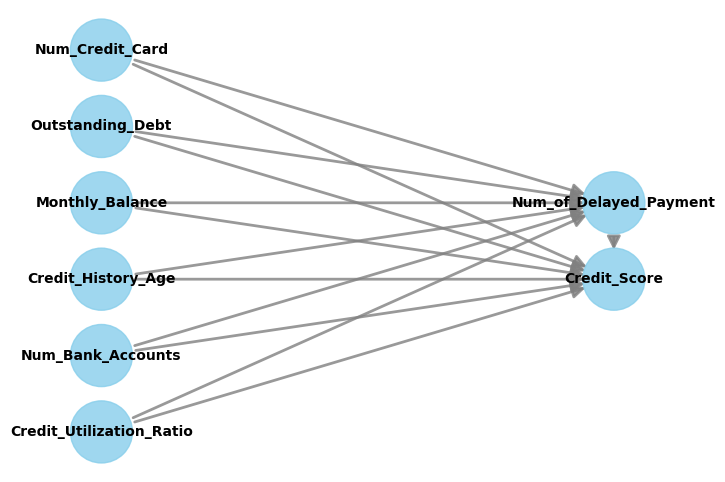

In [54]:
#Build and show the causal model

# Define the Causal Model
model = CausalModel(
    data=df,
    treatment=["Num_of_Delayed_Payment"],
    outcome="Credit_Score",
    common_causes=["Outstanding_Debt", "Num_Bank_Accounts", "Num_Credit_Card",
                   "Credit_Utilization_Ratio", "Monthly_Balance", "Credit_History_Age"]
)

# Show the model's causal graph
model.view_model()

# Display the causal graph
plt.show()


In [55]:
#Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                                                                                      ↪
─────────────────────────(E[Credit_Score|Credit_Utilization_Ratio,Num_Bank_Accounts,Credit_History ↪
d[Num_of_Delayed_Payment]                                                                          ↪

↪                                                        
↪ _Age,Monthly_Balance,Outstanding_Debt,Num_Credit_Card])
↪                                                        
Estimand assumption 1, Unconfoundedness: If U→{Num_of_Delayed_Payment} and U→Credit_Score then P(Credit_Score|Num_of_Delayed_Payment,Credit_Utilization_Ratio,Num_Bank_Accounts,Credit_History_Age,Monthly_Balance,Outstanding_Debt,Num_Credit_Card,U) = P(Credit_Score|Num_of_Delayed_Payment,Credit_Utilization_Ratio,Num_Bank_Accounts,Credit_History_Age,Monthly_Balance,Outstanding_Debt,Num_Credit_Card)

### Estimand 

In [57]:
df['Num_of_Delayed_Payment'].describe()

,Num_of_Delayed_Payment
count,100000.00000
mean,13.39690
std,6.05782
min,0.00000
25%,9.00000
50%,14.00000
75%,18.00000
max,30.00000


In [66]:
#Build a Binary column for those who had more than 5 delayed payments
df['Many_Delayed_Payments'] = (df['Num_of_Delayed_Payment'] > 5).astype(int)

#CausalMl cannot handle categorical outcome here
mapping = {"Poor": 0, "Standard": 1, "Good": 2}
df['Credit_Score_ordinal'] = df['Credit_Score'].map(mapping)

# Define the Causal Model for Binary Treatment
model_binary = CausalModel(
    data=df,
    treatment="Many_Delayed_Payments",
    outcome="Credit_Score_ordinal",
    common_causes=["Outstanding_Debt", "Num_Bank_Accounts", "Num_Credit_Card",
                   "Credit_Utilization_Ratio", "Monthly_Balance", "Credit_History_Age"]
)

identified_estimand = model_binary.identify_effect()
estimate = model_binary.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_matching"
)
print("Estimated Causal Effect:", estimate.value)


Estimated Causal Effect: -0.09475


Interpretation: he treatment reduces the outcome by about 0.09475 units on average, compared to not receiving the treatment. In other words, when MAny detailed payments is 1 (the user had more than 5 delayed payments), credit score will go down by 0.1 (from 2 good toward 0 poor by 0.1 score)

In [64]:
#Debug

#print(df['Many_Delayed_Payments'].unique())
#print(df['Many_Delayed_Payments'].dtype)

for col in ["Outstanding_Debt", "Num_Bank_Accounts", "Num_Credit_Card",
            "Credit_Utilization_Ratio", "Monthly_Balance", "Credit_History_Age"]:
    print(f"{col}: {df[col].head().tolist()}")


Outstanding_Debt: [809, 809, 809, 809, 809]
Num_Bank_Accounts: [3, 3, 3, 3, 3]
Num_Credit_Card: [4, 4, 4, 4, 4]
Credit_Utilization_Ratio: [26.822619623699016, 31.94496005538421, 28.60935202206993, 31.37786186958236, 24.797346908844982]
Monthly_Balance: [312.0, 284.0, 331.0, 223.0, 341.0]
Credit_History_Age: [22.0, 18.0, 22.0, 22.0, 22.0]


In [68]:
#Loop through the threshhold to find the critical number of delayed payments

# List to store the results
results = []

for t in range(1, 29, 5):
    # 1. Create the binary treatment for the current threshold
    df['Many_Delayed_Payments'] = (df['Num_of_Delayed_Payment'] > t).astype(int)

    # 2. Build a new CausalModel for each threshold
    model_binary = CausalModel(
        data=df,
        treatment="Many_Delayed_Payments",
        outcome="Credit_Score_ordinal",  # numeric-coded outcome
        common_causes=[
            "Outstanding_Debt",
            "Num_Bank_Accounts",
            "Num_Credit_Card",
            "Credit_Utilization_Ratio",
            "Monthly_Balance",
            "Credit_History_Age"
        ]
    )

    # 3. Identify the estimand
    identified_estimand = model_binary.identify_effect()

    # 4. Estimate effect using (for example) propensity score matching
    estimate = model_binary.estimate_effect(
        identified_estimand,
        method_name="backdoor.propensity_score_matching"
    )

    # 5. Extract the estimated effect
    effect_value = estimate.value

    # 6. Optionally, get confidence intervals (if the estimator supports them)
    #    Some methods do not provide CIs in DoWhy. We'll try/catch:
    try:
        ci_lower, ci_upper = estimate.get_confidence_intervals()
    except:
        ci_lower, ci_upper = (None, None)

    # 7. Store the results
    results.append([t, effect_value, ci_lower, ci_upper])

# Create a DataFrame of all results
results_df = pd.DataFrame(results, columns=["Threshold", "Effect", "CI_Lower", "CI_Upper"])

print("Results for different thresholds:")
print(results_df)

# Find the threshold with the largest absolute effect
best_idx = results_df["Effect"].abs().idxmax()
best_threshold = results_df.loc[best_idx, "Threshold"]
best_effect = results_df.loc[best_idx, "Effect"]
best_ci = (results_df.loc[best_idx, "CI_Lower"], results_df.loc[best_idx, "CI_Upper"])

print("\nThreshold with the largest absolute estimated effect:")
print(f"  Threshold = {best_threshold}")
print(f"  Estimated Effect = {best_effect:.4f}")
print(f"  95% CI = {best_ci}")

Results for different thresholds:
   Threshold   Effect  CI_Lower  CI_Upper
0          1 -0.27842  -0.31930  -0.16261
1          6 -0.04704  -0.09270  -0.00170
2         11 -0.02766  -0.04822  -0.01540
3         16 -0.07754  -0.13071  -0.05902
4         21 -0.12533  -0.19478  -0.08442
5         26 -0.10801  -0.23241  -0.01845

Threshold with the largest absolute estimated effect:
  Threshold = 1
  Estimated Effect = -0.2784
  95% CI = (-0.31930000000000003, -0.16260999999999998)


**Propensity Score Matching (PSM)**
PSM helps balance the treatment and control groups by matching individuals with similar propensity scores (the likelihood of receiving the treatment). Here we do not have a binary treatment, so we need to use Generalized PSM.

Running PSM for Treatment: Num_of_Delayed_Payment


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


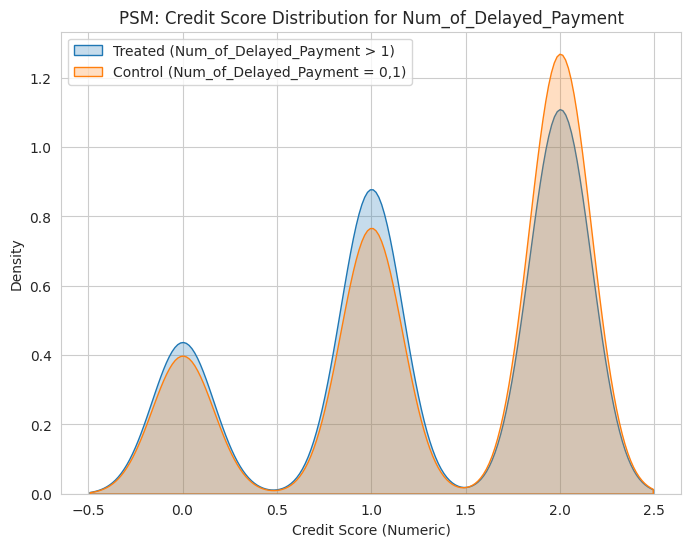

Estimated Causal Effect of Num_of_Delayed_Payment on Credit Score (ATE): -0.0808

📌 Summary of PSM Results:
Num_of_Delayed_Payment: ATE = -0.0808


In [71]:
#Based on our Analysis above, we will add the threshold for late payment: 1

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# List of treatment variables to analyze
treatments = ["Num_of_Delayed_Payment"]

# Define confounders
X_conf = df[["Credit_Utilization_Ratio", "Num_Bank_Accounts", "Credit_History_Age",
             "Monthly_Balance", "Outstanding_Debt", "Num_Credit_Card"]]

# Store results
psm_results = {}

for treatment in treatments:
    print(f"Running PSM for Treatment: {treatment}")

    # Step 1: Compute Propensity Scores (Likelihood of receiving the treatment)
    y_treatment = (df[treatment] > 1).astype(int)  # Binary treatment: 1=Delayed, 0=On-time

    logit = LogisticRegression()
    df["Propensity_Score"] = logit.fit(X_conf, y_treatment).predict_proba(X_conf)[:,1]

    # Step 2: Perform Nearest Neighbor Matching
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(df[df[treatment] == 0]["Propensity_Score"].values.reshape(-1, 1))

    matched_control_indices = nn.kneighbors(df[df[treatment] == 1]["Propensity_Score"].values.reshape(-1, 1), return_distance=False).flatten()
    matched_control = df[df[treatment] == 0].iloc[matched_control_indices]

    # Step 3: Compare Credit Scores in Matched Groups (Numerical)
    treated_credit_scores = df[df[treatment] == 1]["Credit_Score_ordinal"]
    control_credit_scores = matched_control["Credit_Score_ordinal"]

    # Plot Credit Score Distribution in Matched Groups (Fixed KDE Plot)
    plt.figure(figsize=(8,6))
    sns.kdeplot(treated_credit_scores, label=f"Treated ({treatment} > 1)", fill=True)
    sns.kdeplot(control_credit_scores, label=f"Control ({treatment} = 0,1)", fill=True)
    plt.title(f"PSM: Credit Score Distribution for {treatment}")
    plt.xlabel("Credit Score (Numeric)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # Compute Average Treatment Effect (ATE)
    ate = treated_credit_scores.mean() - control_credit_scores.mean()
    psm_results[treatment] = ate
    print(f"Estimated Causal Effect of {treatment} on Credit Score (ATE): {ate:.4f}\n")

# Print final results
print("📌 Summary of PSM Results:")
for treatment, effect in psm_results.items():
    print(f"{treatment}: ATE = {effect:.4f}")


In [53]:
# List of treatment variables to analyze
treatments = ["Delay_from_due_date", "Num_of_Delayed_Payment", "Delay_Zscore"]

for treatment in treatments:
    print(f"Checking data availability for {treatment}:")
    print(df[treatment].value_counts())  # Show how many 0s and 1s exist


Checking data availability for Delay_from_due_date:
Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64
Checking data availability for Num_of_Delayed_Payment:
Num_of_Delayed_Payment
14.0    11261
19.0     5516
17.0     5447
16.0     5351
10.0     5344
15.0     5276
18.0     5250
20.0     5116
12.0     5092
9.0      5021
8.0      4903
11.0     4845
13.0     4059
21.0     2569
7.0      2397
22.0     2355
6.0      2340
5.0      2102
2.0      2060
23.0     2042
3.0      2039
1.0      1968
4.0      1854
24.0     1706
25.0     1674
0.0      1617
26.0      324
27.0      251
28.0      131
30.0       90
Name: count, dtype: int64
Checking data availability for Delay_Zscore:
Delay_Zscore
-0.408394    3596
-0.542983    3424
-0.879454    3324
-0.475688    3313
-0.744866    3281
             ... 
-1.686985      62
 2.956320      56
-1.754280      33
 3.023614     

Meta Learners: refers to a family of strategies for estimating treatment effects by combining standard supervised ML models in different ways.

In [88]:
import numpy as np
import pandas as pd
from causalml.inference.meta import BaseTRegressor
from xgboost import XGBRegressor

treatment = df['Many_Delayed_Payments'].values  # shape: (N,)
y = df['Credit_Score_ordinal'].values           # shape: (N,)

feature_cols = [
    'Outstanding_Debt',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Credit_Utilization_Ratio',
    'Monthly_Balance',
    'Credit_History_Age'
]
X = df[feature_cols].values  # shape: (N, d)

# 2. Initialize T-Learner with XGBoost models
t_learner = BaseTRegressor(
    learner=XGBRegressor(random_state=42),  # Model for treated group (T=1)
    control_learner=XGBRegressor(random_state=42)  # Model for control group (T=0)
)

# 3. Fit the T-Learner
t_learner.fit(X=X, treatment=treatment, y=y)

# 4. Predict Individual Treatment Effects (ITE)
ite_t = t_learner.predict(X)
print("First 5 ITE predictions (T-learner):", ite_t[:5])

# 5. Compute Average Treatment Effect (ATE)
ate_t = np.mean(ite_t)
print(f"Estimated ATE (T-learner): {ate_t:.4f}")


First 5 ITE predictions (T-learner): [[ 0.02995396]
 [ 0.03609157]
 [-0.13097882]
 [-0.38298333]
 [-0.19839638]]
Estimated ATE (T-learner): -0.0820


In [72]:
df['Many_Delayed_Payments'].value_counts() #imbalanced so we go with

,count
Many_Delayed_Payments,
0,99528
1,472


In [73]:
pip install causalml xgboost

In [75]:
pip install --upgrade causalml

In [77]:
import numpy as np
import pandas as pd
from causalml.inference.meta import BaseXRegressor
from xgboost import XGBRegressor

treatment = df['Many_Delayed_Payments'].values  # shape: (N,)
y = df['Credit_Score_ordinal'].values          # shape: (N,)

feature_cols = [
    'Outstanding_Debt',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Credit_Utilization_Ratio',
    'Monthly_Balance',
    'Credit_History_Age'
]
X = df[feature_cols].values  # shape: (N, d)

# Initialize X-learner with, e.g., XGBRegressor for both arms
x_learner = BaseXRegressor(
    learner=XGBRegressor(random_state=42),
)

# Fit the X-learner
x_learner.fit(X, treatment, y)

ite = x_learner.predict(X)
print("First 5 ITE predictions:", ite[:5])

ate_x = np.mean(ite)
print(f"Estimated ATE (X-learner) after controlling for confounders: {ate_x:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

First 5 ITE predictions: [[-0.15078655]
 [-0.20763023]
 [-0.13908808]
 [-0.22667582]
 [-0.16274917]]
Estimated ATE (X-learner) after controlling for confounders: -0.0696


                          Estimated Treatment Effect
Backdoor (DoWhy)                           -0.094750
T-Learner (XGBRegressor)                   -0.081954
X-Learner (XGBRegressor)                   -0.069575


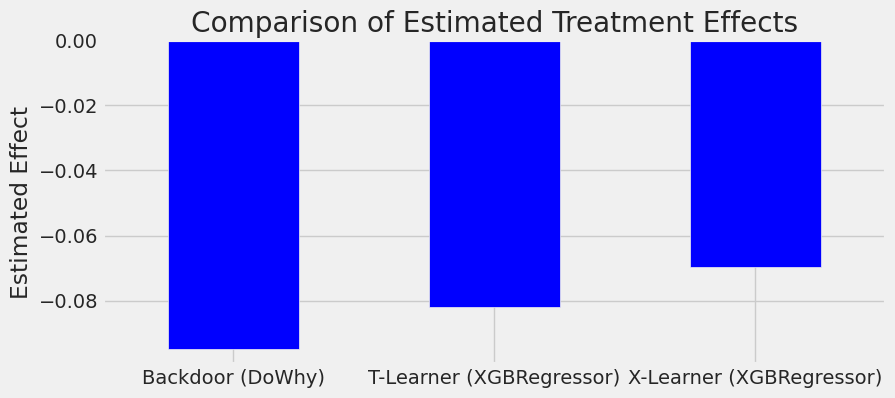

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Store results
treatment_effects = {
    "Backdoor (DoWhy)": -0.09475,  # From previous analysis
    "T-Learner (XGBRegressor)": np.mean(ite_t),  # Ensure consistency with variable names
    "X-Learner (XGBRegressor)": np.mean(ite)  # Include X-Learner results
}

# Convert to DataFrame
df_results = pd.DataFrame.from_dict(treatment_effects, orient="index", columns=["Estimated Treatment Effect"])
print(df_results)

# Plot results
df_results.plot(kind="bar", legend=False, color=["blue", "green", "red", "purple"], figsize=(9, 4))
plt.title("Comparison of Estimated Treatment Effects")
plt.ylabel("Estimated Effect")
plt.xticks(rotation=0)
plt.show()


Feauture importance and SHAP values

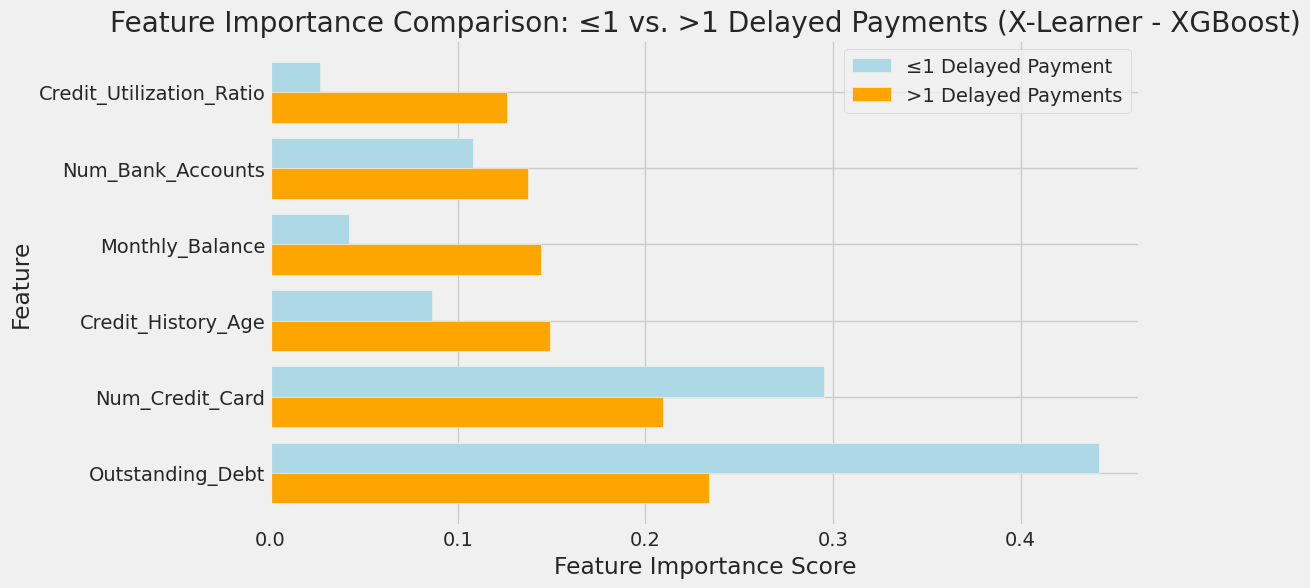

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

xgb_model_control = t_learner.models_c[list(t_learner.models_c.keys())[0]]
xgb_model_treated = t_learner.models_t[list(t_learner.models_t.keys())[0]]

# Extract feature importance from the base models used in X-Learner
feature_importance_control = xgb_model_control.feature_importances_  # Model for control group (T=0)
feature_importance_treated = xgb_model_treated.feature_importances_  # Model for treated group (T=1)

# Ensure correct feature names
feature_cols = [
    "Outstanding_Debt",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Credit_Utilization_Ratio",
    "Monthly_Balance",
    "Credit_History_Age"
]

# Convert to DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    "Feature": feature_cols,
    "Control (≤1 Delayed Payment)": feature_importance_control,
    "Treated (>1 Delayed Payments)": feature_importance_treated
})

# Sort by importance in the treated group
feature_importance_df = feature_importance_df.sort_values(by="Treated (>1 Delayed Payments)", ascending=True)

# Plot comparison
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(feature_importance_df))

plt.barh(index, feature_importance_df["Control (≤1 Delayed Payment)"], bar_width, label="≤1 Delayed Payment", color="lightblue")
plt.barh(index + bar_width, feature_importance_df["Treated (>1 Delayed Payments)"], bar_width, label=">1 Delayed Payments", color="orange")

# Labels and formatting
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance Comparison: ≤1 vs. >1 Delayed Payments (X-Learner - XGBoost)")
plt.yticks(index + bar_width / 2, feature_importance_df["Feature"])
plt.legend()
plt.gca().invert_yaxis()  # Flip y-axis to show most important features on top
plt.show()


100%|===================| 99898/100000 [06:50<00:00]       

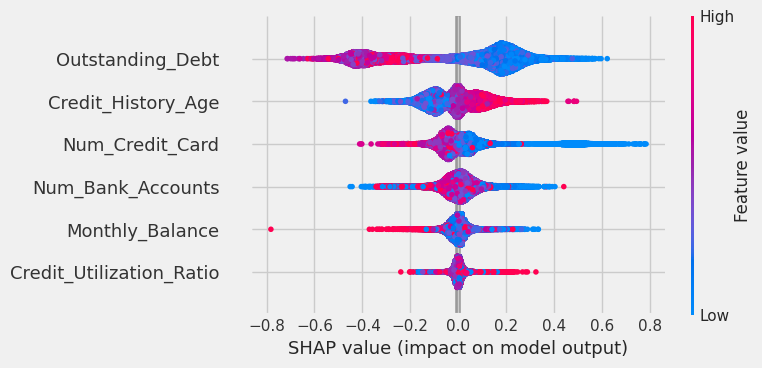

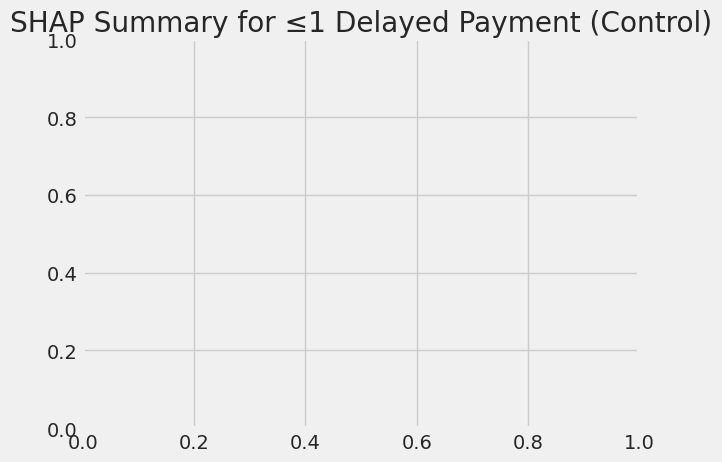

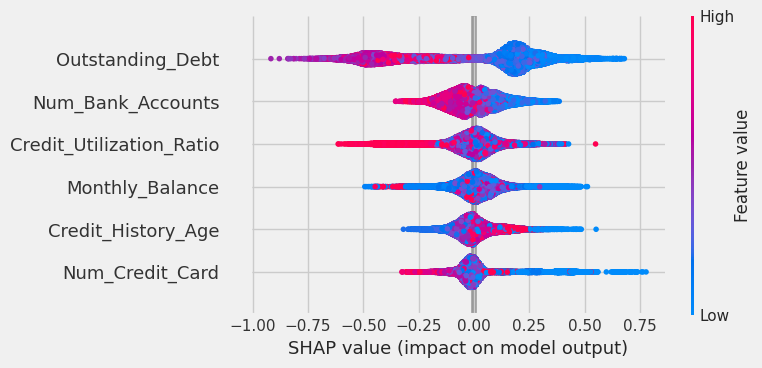

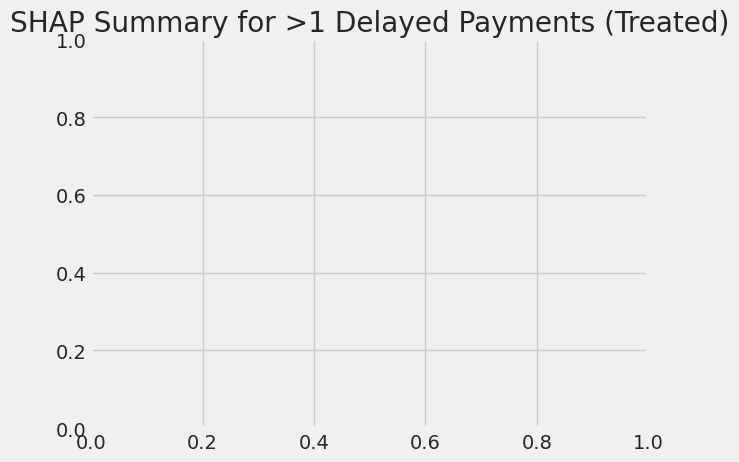

In [101]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure we use correct feature names
feature_cols = [
    "Outstanding_Debt",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Credit_Utilization_Ratio",
    "Monthly_Balance",
    "Credit_History_Age"
]

# Use the same `X` data that was used to train the T-Learner
X = df[feature_cols].values  # Ensure X is correctly defined

# Extract trained models from T-Learner
xgb_model_control = t_learner.models_c[list(t_learner.models_c.keys())[0]]  # Control model (≤1 delayed payment)
xgb_model_treated = t_learner.models_t[list(t_learner.models_t.keys())[0]]  # Treated model (>1 delayed payments)

# Initialize SHAP explainers
explainer_control = shap.Explainer(xgb_model_control, X)  # Pass X explicitly
explainer_treated = shap.Explainer(xgb_model_treated, X)  # Pass X explicitly

# Compute SHAP values
shap_values_control = explainer_control(X)  # SHAP values for control group
shap_values_treated = explainer_treated(X)  # SHAP values for treated group

# Convert SHAP values to DataFrame
shap_df_control = pd.DataFrame(shap_values_control.values, columns=feature_cols)
shap_df_treated = pd.DataFrame(shap_values_treated.values, columns=feature_cols)

# Plot SHAP Summary for Control Group
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values_control, X, feature_names=feature_cols)
plt.title("SHAP Summary for ≤1 Delayed Payment (Control)")
plt.show()

# Plot SHAP Summary for Treated Group
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values_treated, X, feature_names=feature_cols)
plt.title("SHAP Summary for >1 Delayed Payments (Treated)")
plt.show()


## **Causal Inference Model Description (Credit Change Limit): Option2** -> no relationship

**Research Question**: Does an increase or decrease in credit limit influence an individual's credit score over time? The frequency of credit limit changes could reflect financial behavior and lender confidence.

**Treatment Variable**: Changed_Credit_Limit (Number of times a user requested or had their credit limit changed)

**Outcome Variable**: Credit_Score (Categorized as “Good,” “Standard,” or “Poor.”)

**Control Variables**:
Outstanding_Debt, Num_Bank_Accounts, Num_Credit_Card, Monthly_Inhand_Salary, Monthly_Inhand_Salary_log, income_zscore, Age

In [25]:
df['Changed_Credit_Limit'].describe()

,Changed_Credit_Limit
count,100000.000000
mean,9.945490
std,6.605945
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,36.000000


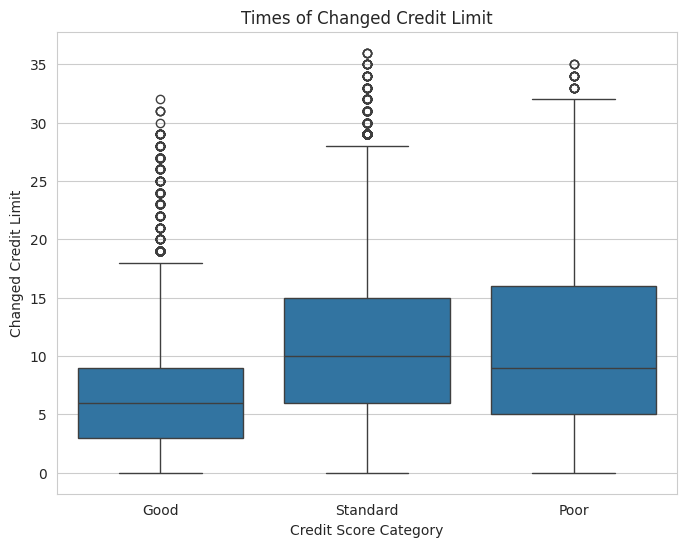

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x="Credit_Score", y="Changed_Credit_Limit", data=df)
plt.title("Times of Changed Credit Limit")
plt.xlabel("Credit Score Category")
plt.ylabel("Changed Credit Limit")
plt.show()


In [29]:
import scipy.stats as stats

# Perform ANOVA
anova_result = stats.f_oneway(
    df[df["Credit_Score"] == "Good"]["Changed_Credit_Limit_Lag"],
    df[df["Credit_Score"] == "Standard"]["Changed_Credit_Limit_Lag"],
    df[df["Credit_Score"] == "Poor"]["Changed_Credit_Limit_Lag"]
)

print(f"ANOVA Test Statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Significant difference in Changed_Credit_Limit across Credit Scores.")
else:
    print("No significant difference in Changed_Credit_Limit across Credit Scores.")


ANOVA Test Statistic: nan
P-value: nan
No significant difference in Changed_Credit_Limit across Credit Scores.


So we won't continue the analysis

## **Causal Inference Model Description (Credit Utilization Ratio): Option3** -> no relationship

Research Question: It is believed that credit utilization ratio and credit score are inversely correlated and keeping this ratio relatively low is one of the most straightforward ways to maintain a healthier credit score.
Does having a higher credit utilization ratio cause a lower credit score?

**Treatment Variable:** Credit_Utilization_Ratio

**Outcome Variable:** Credit Score: categorized as “Good,” “Standard,” or “Poor.”

**Control Variables:**  Outstanding_Debt, Num_Bank_Accounts, Num_Credit_Card,Monthly_Inhand_Salary, Monthly_Inhand_Salary_log, income_zscore, Age

 Outstanding_Debt, Num_Bank_Accounts, and Num_Credit_Card capture an individual's overall credit exposure, while Monthly_Inhand_Salary, its log transformation, and income_zscore control for income-related differences in credit management. Age and Credit_History_Age account for the impact of longer credit history and financial maturity, which may influence both credit utilization and score. These controls which are more at the user level, help isolate the causal effect of credit utilization ratio on credit score.

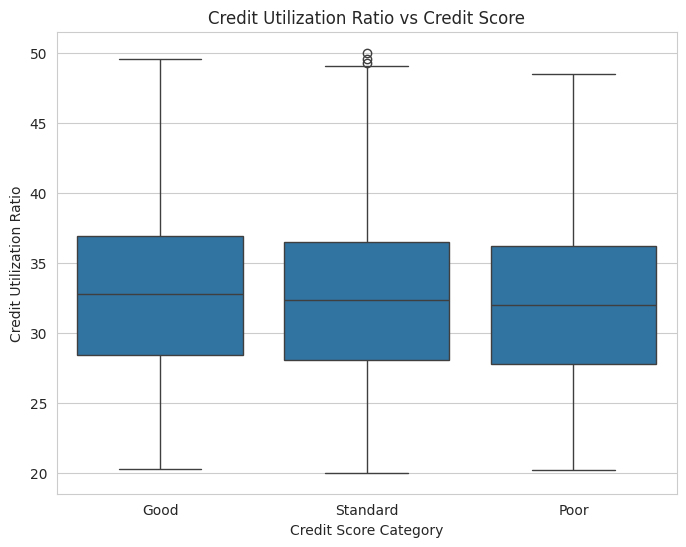

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(8, 6))

# Boxplot: Credit Utilization Ratio vs Credit Score Category
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df)

# Title and labels
plt.title('Credit Utilization Ratio vs Credit Score')
plt.xlabel('Credit Score Category')
plt.ylabel('Credit Utilization Ratio')

# Show the plot
plt.show()


It looks like the distribution is very similar in differnet categories of credit scores. so we need further analysis before decising if it can be analyzed as a treatment or not.
Credit score is a categorical variable so we cannot go with correlation, we will check it with ANOVA instead.

In [15]:
import scipy.stats as stats

# Group Credit Utilization Ratio by Credit Score categories
group_good = df[df["Credit_Score"] == "Good"]["Credit_Utilization_Ratio"]
group_standard = df[df["Credit_Score"] == "Standard"]["Credit_Utilization_Ratio"]
group_poor = df[df["Credit_Score"] == "Poor"]["Credit_Utilization_Ratio"]

# Perform ANOVA test
anova_result = stats.f_oneway(group_good, group_standard, group_poor)

# Print results
print(f"ANOVA Test Statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("There is a significant difference in Credit Utilization Ratio across Credit Score categories.")
else:
    print("There is NO significant difference in Credit Utilization Ratio across Credit Score categories.")


ANOVA Test Statistic: 105.2967
P-value: 0.0000
There is a significant difference in Credit Utilization Ratio across Credit Score categories.


Intersting! so even when the distributions in boxplots were very similar and overlapping aniva tells us there is significant differneces with the means. lets check it further with plotting the means

<ipython-input-16-78cf103af547>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Credit_Score", y="Credit_Utilization_Ratio", data=df, ci=95)


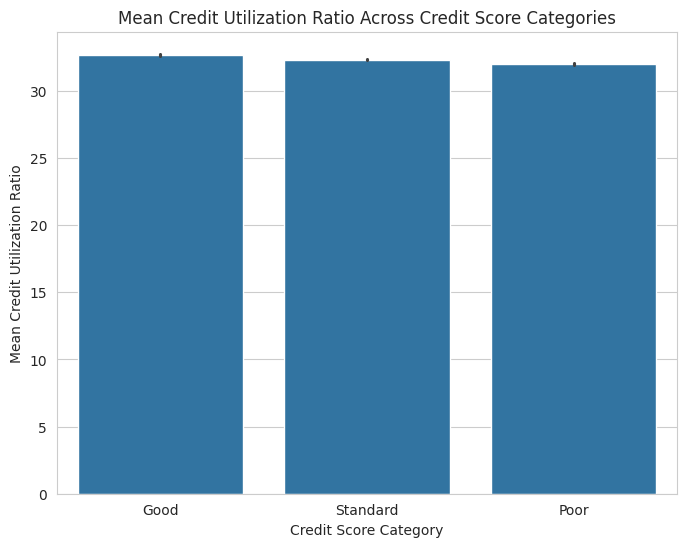

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x="Credit_Score", y="Credit_Utilization_Ratio", data=df, ci=95)
plt.title("Mean Credit Utilization Ratio Across Credit Score Categories")
plt.xlabel("Credit Score Category")
plt.ylabel("Mean Credit Utilization Ratio")
plt.show()


ANOVA tests for statistical significance, meaning that even tiny numerical differences in means can be detected as significant if the sample size is large. Compute effect size (Eta-squared) to see if the difference is meaningful in practice.

In [19]:
df['Credit_Utilization_Ratio'].describe()

,Credit_Utilization_Ratio
count,100000.000000
mean,32.285173
std,5.116875
min,20.000000
25%,28.052567
50%,32.305784
75%,36.496663
max,50.000000


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit an ANOVA model
model = ols("Credit_Utilization_Ratio ~ C(Credit_Score)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Compute Eta-Squared (Effect Size)
eta_squared = anova_table["sum_sq"][0] / anova_table["sum_sq"].sum()

# Print the ANOVA table and effect size
print(anova_table)
print(f"Corrected Effect Size (Eta-Squared): {eta_squared:.4f}")


                       sum_sq       df           F        PR(>F)
C(Credit_Score)  5.502366e+03      2.0  105.296722  2.081137e-46
Residual         2.612712e+06  99997.0         NaN           NaN
Corrected Effect Size (Eta-Squared): 0.0021


<ipython-input-20-e1f53d416b82>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_squared = anova_table["sum_sq"][0] / anova_table["sum_sq"].sum()


0.0021 is an extremely small effect size, meaning that while ANOVA found a statistically significant difference in Credit Utilization Ratio across credit score categories, the practical impact is negligible. **So we do not continue with this option!**

## **Causal Inference Model Description (Payment Behaviour): Option4** -> no relationship

**Research Question**:
It is believed that an individual’s payment behaviour significantly impacts their credit score. Does having a particular Payment Behaviour pattern cause a better or worse Credit Score?

**Treatment Variable**: Payment_Behaviour (Categorical: Different spending & payment patterns)

**Outcome Variable**: Credit_Score (Categorized as “Good,” “Standard,” or “Poor.”)

**Control Variables**:
Outstanding_Debt, Num_Bank_Accounts, Num_Credit_Card, Monthly_Inhand_Salary, Monthly_Inhand_Salary_log, income_zscore, Age

In [30]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


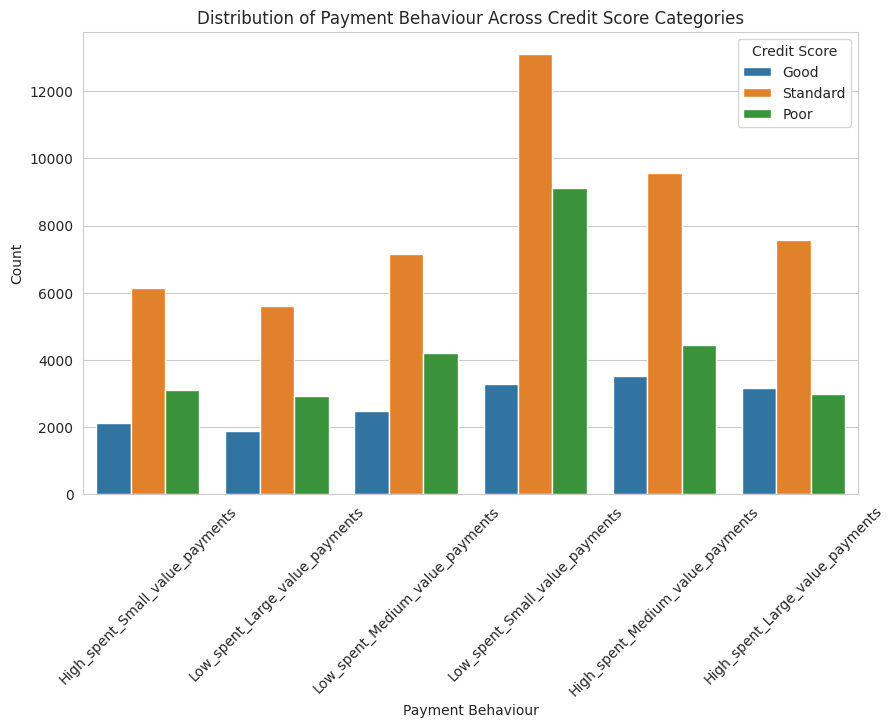

In [31]:
#Check the relationship between unique values of payment behaviour and credit_score

import matplotlib.pyplot as plt
import seaborn as sns

# Drop the invalid value from Payment_Behaviour
df = df[df["Payment_Behaviour"] != "!@9#%8"]

# Create a countplot to visualize the distribution of Payment_Behaviour across Credit Score categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Payment_Behaviour", hue="Credit_Score")

# Customize the plot
plt.title("Distribution of Payment Behaviour Across Credit Score Categories")
plt.xlabel("Payment Behaviour")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title="Credit Score")

# Show the plot
plt.show()


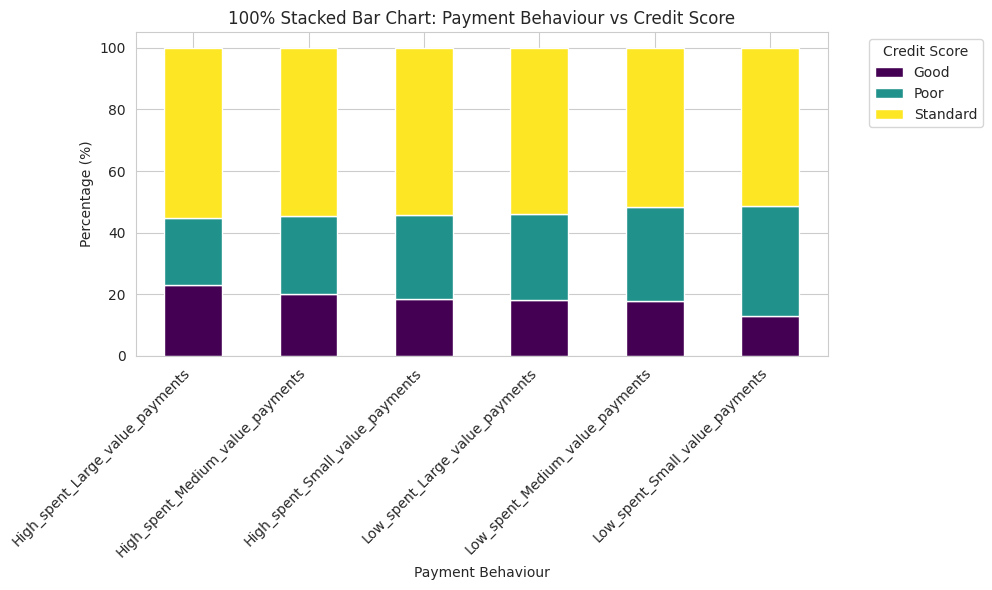

In [32]:
#Chaneg the graph to 100 stacked bar so we can take a look at the ratios and have a better undertsnding

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop the invalid value from Payment_Behaviour
df = df[df["Payment_Behaviour"] != "!@9#%8"]

# Compute the count of each category
payment_credit_counts = df.groupby(["Payment_Behaviour", "Credit_Score"]).size().unstack()

# Convert counts to percentages (normalize by row)
payment_credit_percent = payment_credit_counts.div(payment_credit_counts.sum(axis=1), axis=0) * 100

# Plot a 100% stacked bar chart
payment_credit_percent.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Customize the plot
plt.title("100% Stacked Bar Chart: Payment Behaviour vs Credit Score")
plt.xlabel("Payment Behaviour")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")  # Rotate labels for better readability
plt.legend(title="Credit Score", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
import scipy.stats as stats
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(df["Payment_Behaviour"], df["Credit_Score"])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant relationship between Payment Behaviour and Credit Score.")
else:
    print("No significant relationship found between Payment Behaviour and Credit Score.")


Chi-Square Statistic: 1430.6229
P-value: 0.0000
There is a significant relationship between Payment Behaviour and Credit Score.


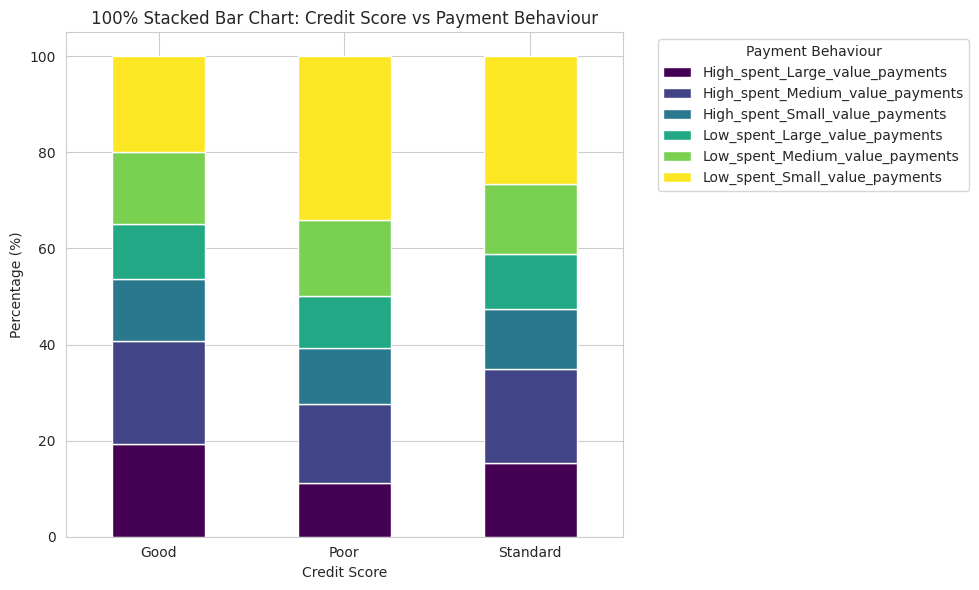

In [36]:
#Flip the axis to see if we can capture the relationship
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop the invalid value from Payment_Behaviour
df = df[df["Payment_Behaviour"] != "!@9#%8"]

# Compute the count of each Payment Behaviour within each Credit Score category
credit_payment_counts = df.groupby(["Credit_Score", "Payment_Behaviour"]).size().unstack()

# Convert counts to percentages (normalize by column)
credit_payment_percent = credit_payment_counts.div(credit_payment_counts.sum(axis=1), axis=0) * 100

# Plot a 100% stacked bar chart
credit_payment_percent.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Customize the plot
plt.title("100% Stacked Bar Chart: Credit Score vs Payment Behaviour")
plt.xlabel("Credit Score")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Payment Behaviour", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
import numpy as np
import scipy.stats as stats

# Create contingency table
contingency_table = pd.crosstab(df["Credit_Score"], df["Payment_Behaviour"])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Compute Cramér's V
n = contingency_table.sum().sum()  # Total sample size
min_dim = min(contingency_table.shape) - 1  # Minimum of rows or columns minus 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Cramér's V (Effect Size): {cramers_v:.4f}")

# Interpretation
if cramers_v < 0.1:
    print("Negligible relationship")
elif cramers_v < 0.3:
    print("Small relationship")
elif cramers_v < 0.5:
    print("Moderate relationship")
else:
    print("Strong relationship")


Chi-Square Statistic: 1430.6229
P-value: 0.0000
Cramér's V (Effect Size): 0.0880
Negligible relationship


Chi-Square tells us if there is any relationship, but it doesn't tell us how strong the relationship is. So Cramer's v tell us we should not continue. but we will try to see if we find a relationship for a specific group of customers.

## **Causal Inference Model Description (No of Loans): Option5**